In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
x = np.linspace(-3, 3, 100)
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [57]:
rng = np.random.RandomState(42)  

y = np.sin(4*x) + x + rng.uniform(size=len(x))

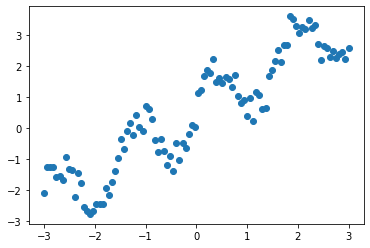

In [58]:
plt.plot(x, y, 'o');

In [59]:
# add on dimension to use in sklearn
X = x[:, np.newaxis]
X.shape

(100, 1)

In [60]:
from sklearn.model_selection import train_test_split

# randome_state 42 we got RMSE of 824.33
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [62]:
print('cooef: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

cooef:  [0.90211711]
y-axis intercept:  0.44840974988268


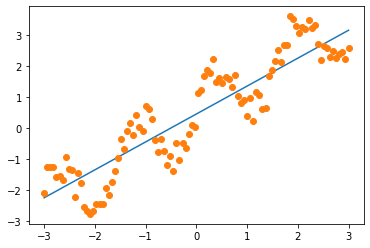

In [63]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X, y, 'o')

In [64]:
ytrain_predict = regressor.predict(X_train)

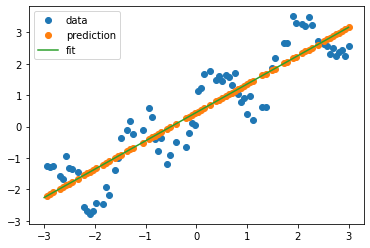

In [65]:
# test training data
plt.plot(X_train, Y_train, 'o', label='data')
plt.plot(X_train, ytrain_predict, 'o', label='prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

as we can see in the plot above, the line is ableto capture the general slope of the data, but not many edtails.
Next, let's try the test set:

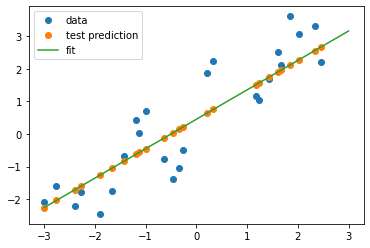

In [66]:
# predict test data
ytest_predict = regressor.predict(X_test)
plt.plot(X_test, Y_test, 'o', label='data')
plt.plot(X_test, ytest_predict, 'o', label='test prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values
    $$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [67]:
# R^2 scores tell how model is good
regressor.score(X_test, Y_test)

0.7994321405079685

<div class="alert alert-success">
   <b>EXERCISE</b>
     <ul>
       <li>
            add a Feature containing `sin(4x)` to `X` and redo fi. Visualize the prediction with new richer, yet linear, model.
       </li>
   </ul>
</div>

(75, 2)


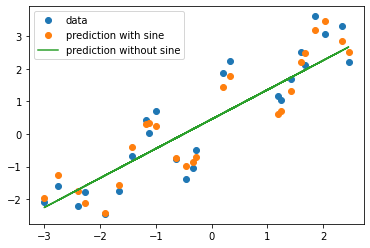

In [68]:
# %load https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/main/solutions/07A_lin_with_sine.py
XX_train = np.concatenate((X_train, np.sin(4 * X_train)), axis=1)
print(XX_train.shape)
XX_test = np.concatenate((X_test, np.sin(4 * X_test)), axis=1)
regressor.fit(XX_train, Y_train)
Y_pred_test_sine = regressor.predict(XX_test)

plt.plot(X_test, Y_test, 'o', label="data")
plt.plot(X_test, Y_pred_test_sine, 'o', label="prediction with sine")
plt.plot(X_test, ytest_predict, label='prediction without sine')
plt.legend(loc='best');


<div class="alert alert-success">
  <b>EXERCISE</b>
    <ul>
      <li>
          compare KNeighborsRegressor and LinearRegression on the boston housing dataset.
      </li>
    </ul>
</div>

D:\Programming\Python\sample projects\ML\senv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

X.shape: (506, 13)
boston.features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Linear Regression Train/Test: 0.748/0.684
KNeighborsRegressor Train/Test: 0.752/0.695


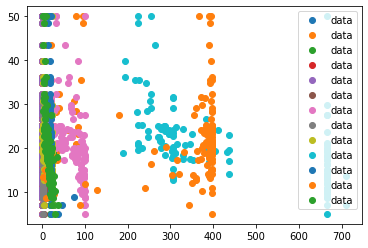

In [69]:
# %load https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/main/solutions/07B_knn_vs_linreg.py
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier


boston = load_boston()
X = boston.data
Y = boston.target

print('X.shape:', X.shape)
print('boston.features: ', boston.feature_names)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors=3)

linreg.fit(xtrain, ytrain)
print('Linear Regression Train/Test: %.3f/%.3f' % (linreg.score(xtrain, ytrain), linreg.score(xtest, ytest)))

knnreg.fit(xtrain, ytrain)
print('KNeighborsRegressor Train/Test: %.3f/%.3f' % (knnreg.score(xtrain, ytrain), knnreg.score(xtest, ytest)))


plt.plot(xtest, ytest, 'o', label="data")
plt.legend(loc='best');

<div class="alert alert-warning">
<b>Warning</b>: The Boston housing prices dataset has an ethical problem: as investigated in <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#rec2f484fdebe-1">[1]</a>, the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#rec2f484fdebe-2">[2]</a>. Furthermore the goal of the research that led to the creation of this dataset was to study the impact of air quality but it did not give adequate demonstration of the validity of this assumption.
The scikit-learn maintainers therefore strongly discourage the use of this dataset unless the purpose of the code is to study and educate about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original source:
</div>

data.shape: (506, 13)
Linear Regression Train/Test: 0.748/0.684
KNeighborsRegressor Train/Test: 0.752/0.695


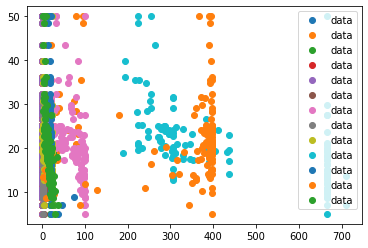

In [70]:
import pandas as pd
import numpy as np

dataurl = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(dataurl, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # why odd rows have [:2] columns  
target = raw_df.values[1::2, 2]

print('data.shape:', data.shape)

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors=3)

linreg.fit(x_train, ytrain)
print('Linear Regression Train/Test: %.3f/%.3f' % (linreg.score(x_train, y_train), linreg.score(x_test, y_test)))

knnreg.fit(x_train, y_train)
print('KNeighborsRegressor Train/Test: %.3f/%.3f' % (knnreg.score(x_train, y_train), knnreg.score(x_test, y_test)))

plt.plot(xtest, ytest, 'o', label="data")
plt.legend(loc='best');